In [138]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib

## 데이터 전처리

In [26]:
cctvRaw = pd.read_excel('경기도 CCTV 0347.xlsx', encoding = 'cp949')
cctvRaw.rename(columns = {'경도':'위도', '위도':'경도'}, inplace = True)

cctvRaw.head(2)

,지역,Unnamed: 1,주소,종류,CCTV 대수,ㄴㅁㅇㄹ,asd,aasd,asd.1,asd.2,위도,경도,asd.3,asd.4,asd.5
0,경기도 고양시,NaN,경기도 고양시 덕양구 관산동 657-31 (관산동660-8 꼬끄돈볶음 맞은편),생활방범,5,200.0,360도전방면,30.0,NaT,031-8075-2579,37.694920,126.861551,2020-01-09,3940000,경기도 고양시
1,경기도 고양시,NaN,경기도 고양시 덕양구 관산동 584-4 (365플러스 앞 사거리),생활방범,5,200.0,360도전방면,30.0,NaT,031-8075-2579,37.673629,126.862046,2020-01-09,3940000,경기도 고양시


In [27]:
cctvRaw = cctvRaw[['주소', '종류', 'CCTV 대수', '위도', '경도']]

cctvRaw.head(2)

,주소,종류,CCTV 대수,위도,경도
0,경기도 고양시 덕양구 관산동 657-31 (관산동660-8 꼬끄돈볶음 맞은편),생활방범,5,37.694920,126.861551
1,경기도 고양시 덕양구 관산동 584-4 (365플러스 앞 사거리),생활방범,5,37.673629,126.862046


In [28]:
# cctvRaw DF 완성

for i in cctvRaw.index:
    a = str(cctvRaw['주소'][i]).split()
    cctvRaw['주소'][i] = a[1]
    
cctvRaw.head()

<ipython-input-28-469ad505b9fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cctvRaw['주소'][i] = a[1]


,주소,종류,CCTV 대수,위도,경도
0,고양시,생활방범,5,37.694920,126.861551
1,고양시,생활방범,5,37.673629,126.862046
2,고양시,생활방범,4,37.705580,126.859683
3,고양시,생활방범,3,37.687958,126.767260
4,고양시,생활방범,4,37.655158,126.835797


In [29]:
cctvRaw.rename(columns = {'주소':'지역'}, inplace = True)
cctvRaw

,지역,종류,CCTV 대수,위도,경도
0,고양시,생활방범,5,37.694920,126.861551
1,고양시,생활방범,5,37.673629,126.862046
2,고양시,생활방범,4,37.705580,126.859683
3,고양시,생활방범,3,37.687958,126.767260
4,고양시,생활방범,4,37.655158,126.835797
...,...,...,...,...,...
13512,화성시,생활방범,4,37.194522,126.831165
13513,화성시,생활방범,4,37.196191,126.832467
13514,화성시,생활방범,4,37.195966,126.832468
13515,화성시,생활방범,4,37.195380,126.832492


In [30]:
cctvRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13517 entries, 0 to 13516
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역       13517 non-null  object 
 1   종류       13517 non-null  object 
 2   CCTV 대수  13517 non-null  int64  
 3   위도       13517 non-null  float64
 4   경도       13517 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 528.1+ KB


In [31]:
cctv = cctvRaw[['지역', 'CCTV 대수']]
cctv.head()

,지역,CCTV 대수
0,고양시,5
1,고양시,5
2,고양시,4
3,고양시,3
4,고양시,4


In [32]:
# cctv 완성

cctv = cctv.groupby('지역').sum()
cctv = cctv.reset_index(level = '지역')
cctv

,지역,CCTV 대수
0,고양시,4246
1,광명시,854
2,구리시,411
3,동두천시,1008
4,부천시,207
5,성남시,1323
6,수원시,15480
7,시흥시,2028
8,안산시,9052
9,안양시,1263


In [63]:
crimeRaw = pd.read_csv('CRIME.csv', encoding = 'cp949')

crimeRaw.fillna(0, inplace = True)
crimeRaw.replace('-', 0, inplace = True)

crimeRaw['노동범죄'] = crimeRaw['노동범죄'].astype(float)
crimeRaw['안보범죄'] = crimeRaw['안보범죄'].astype(float)
crimeRaw['선거범죄'] = crimeRaw['선거범죄'].astype(float)
crimeRaw['환경범죄'] = crimeRaw['환경범죄'].astype(float)

crimeRaw.head(2)
crimeRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28 non-null     int64  
 1   지역          28 non-null     object 
 2   계           28 non-null     int64  
 3   강력범죄        28 non-null     int64  
 4   절도범죄        28 non-null     int64  
 5   폭력범죄        28 non-null     int64  
 6   지능범죄        28 non-null     int64  
 7   풍속범죄        28 non-null     int64  
 8   특별경제범죄      28 non-null     int64  
 9   마약범죄        28 non-null     int64  
 10  보건범죄        28 non-null     int64  
 11  환경범죄        28 non-null     float64
 12  교통범죄        28 non-null     int64  
 13  노동범죄        28 non-null     float64
 14  안보범죄        28 non-null     float64
 15  선거범죄        28 non-null     float64
 16  병역범죄        28 non-null     int64  
 17  기타범죄        28 non-null     int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 4.1+ KB


In [108]:
crime = crimeRaw[['지역','계', '강력범죄', '절도범죄', '폭력범죄', '교통범죄']]
crime.head()

,지역,계,강력범죄,절도범죄,폭력범죄,교통범죄
0,고양시,26957,400,2262,5024,7349
1,과천시,1777,21,175,211,607
2,광명시,8364,144,1027,1626,2169
3,광주시,9743,103,812,1866,3071
4,구리시,6458,109,833,1551,1578


In [116]:
# crime 완성

crime['관련범죄 합계'] = crime['강력범죄'] + crime['절도범죄'] + crime['교통범죄'] + crime['폭력범죄']
crime.rename(columns = {'계':'총 범죄수'}, inplace = True)
crime.head()

<ipython-input-116-4f8c5949dcd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime['관련범죄 합계'] = crime['강력범죄'] + crime['절도범죄'] + crime['교통범죄'] + crime['폭력범죄']
C:\conda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,지역,총 범죄수,강력범죄,절도범죄,폭력범죄,교통범죄,관련범죄 합계
0,고양시,26957,400,2262,5024,7349,15035
1,과천시,1777,21,175,211,607,1014
2,광명시,8364,144,1027,1626,2169,4966
3,광주시,9743,103,812,1866,3071,5852
4,구리시,6458,109,833,1551,1578,4071


In [111]:
# 시각화를 위한 DF완성

df = pd.merge(cctv, crime, how = 'left', on = '지역', sort = True)
df.head()

,지역,CCTV 대수,총 범죄수,강력범죄,절도범죄,폭력범죄,교통범죄,관련범죄 합계
0,고양시,4246,26957.0,400.0,2262.0,5024.0,7349.0,15035.0
1,광명시,854,8364.0,144.0,1027.0,1626.0,2169.0,4966.0
2,구리시,411,6458.0,109.0,833.0,1551.0,1578.0,4071.0
3,동두천시,1008,3249.0,62.0,329.0,674.0,764.0,1829.0
4,부천시,207,29240.0,460.0,3715.0,5136.0,6974.0,16285.0


## 데이터 시각화
### 범죄유형별 비율

In [134]:
crimeRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28 non-null     int64  
 1   지역          28 non-null     object 
 2   계           28 non-null     int64  
 3   강력범죄        28 non-null     int64  
 4   절도범죄        28 non-null     int64  
 5   폭력범죄        28 non-null     int64  
 6   지능범죄        28 non-null     int64  
 7   풍속범죄        28 non-null     int64  
 8   특별경제범죄      28 non-null     int64  
 9   마약범죄        28 non-null     int64  
 10  보건범죄        28 non-null     int64  
 11  환경범죄        28 non-null     float64
 12  교통범죄        28 non-null     int64  
 13  노동범죄        28 non-null     float64
 14  안보범죄        28 non-null     float64
 15  선거범죄        28 non-null     float64
 16  병역범죄        28 non-null     int64  
 17  기타범죄        28 non-null     int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 4.1+ KB


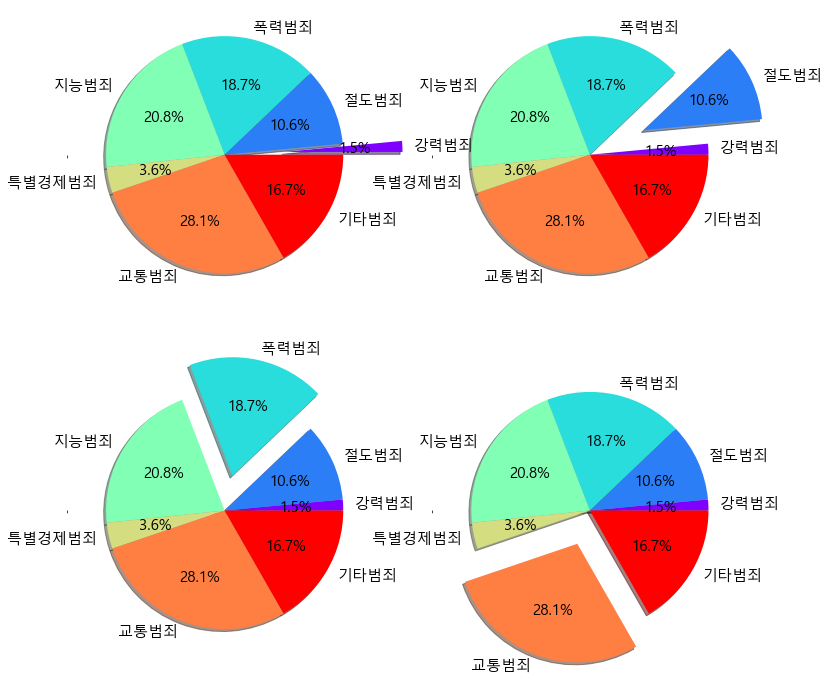

In [140]:
CRIME_sum = []

for i in crimeRaw.columns[1:18]:
    if '범죄' in i:
        CRIME_sum.append(crimeRaw[i].sum())

CRIME_name = ['강력범죄','절도범죄','폭력범죄','지능범죄','특별경제범죄','교통범죄','기타범죄']
        
etc = (CRIME_sum[4]+CRIME_sum[6]+CRIME_sum[7]+
       CRIME_sum[8]+CRIME_sum[10]+CRIME_sum[11]+
       CRIME_sum[12]+CRIME_sum[13]++CRIME_sum[14])

CRIME_sum = [CRIME_sum[0], CRIME_sum[1], CRIME_sum[2], 
             CRIME_sum[3], CRIME_sum[5], CRIME_sum[9], etc]


# 강력범죄
plt.subplot(2,2,1)
explode_value1 = (0.5, 0, 0, 0, 0, 0, 0)
CRIME_pie = pd.Series(CRIME_sum, index = CRIME_name, name = '-')
CRIME_pie.plot.pie(autopct='%.1f%%', cmap=("rainbow"), explode = explode_value1, shadow = True, figsize = (12,12), fontsize = 15)

# 절도범죄
plt.subplot(2,2,2)
explode_value2 = (0, 0.5, 0, 0, 0, 0, 0)
CRIME_pie = pd.Series(CRIME_sum, index = CRIME_name, name = '-')
CRIME_pie.plot.pie(autopct='%.1f%%', cmap=("rainbow"), explode = explode_value2, shadow = True, fontsize = 15)

# 폭력범죄
plt.subplot(2,2,3)
explode_value3 = (0, 0, 0.3, 0, 0, 0, 0)
CRIME_pie = pd.Series(CRIME_sum, index = CRIME_name, name = '-')
CRIME_pie.plot.pie(autopct='%.1f%%', cmap=("rainbow"), explode = explode_value3, shadow = True, fontsize = 15)

# 교통범죄
plt.subplot(2,2,4)
explode_value4 = (0, 0, 0, 0, 0, 0.3, 0)
CRIME_pie = pd.Series(CRIME_sum, index = CRIME_name, name = '-')
CRIME_pie.plot.pie(autopct='%.1f%%', cmap=("rainbow"), explode = explode_value4, shadow = True, fontsize = 15)

plt.show()


### 지역별 CCTV 대수

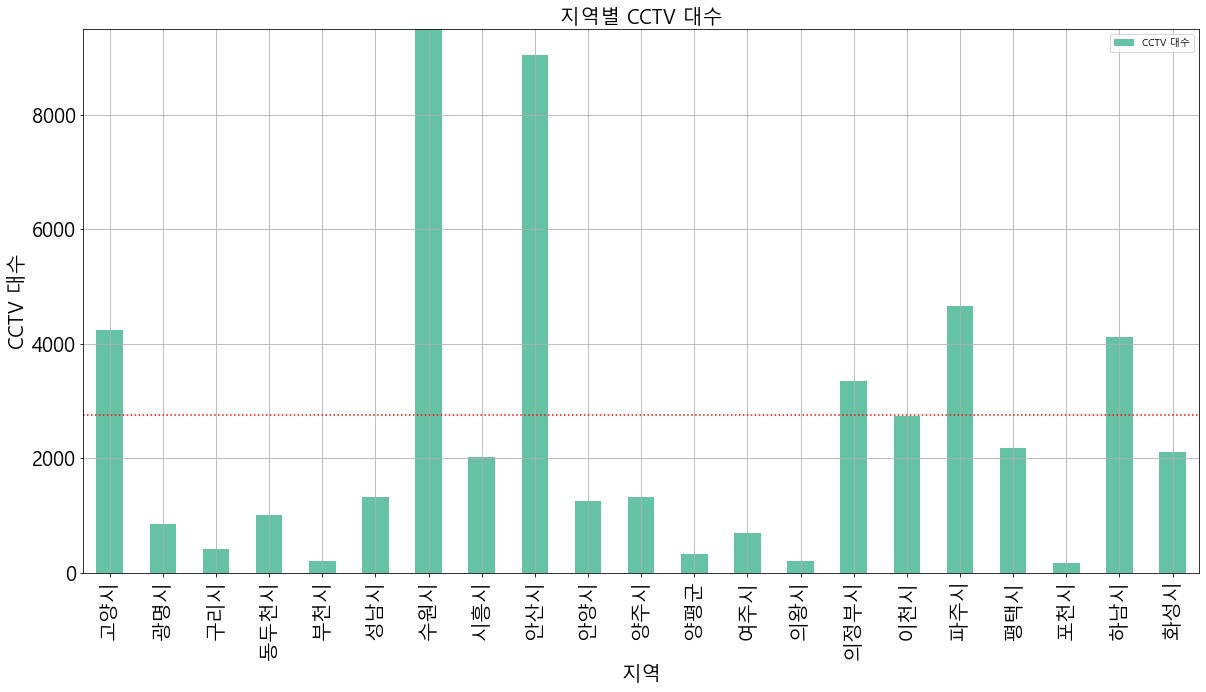

In [147]:
CCTV_bar = df.plot.bar(x = '지역', y = 'CCTV 대수', grid = True, cmap = 'Set2', figsize = (20,10), fontsize = 20)
CCTV_bar.set_xlabel("지역", fontsize = 20)
CCTV_bar.set_ylabel("CCTV 대수", fontsize = 20)
CCTV_bar.set_title("지역별 CCTV 대수", fontsize = 20)

plt.axhline(2751, color='red', linestyle = ':')
plt.ylim(0,9500)
plt.show()

### 지역별 범죄발생 총 수

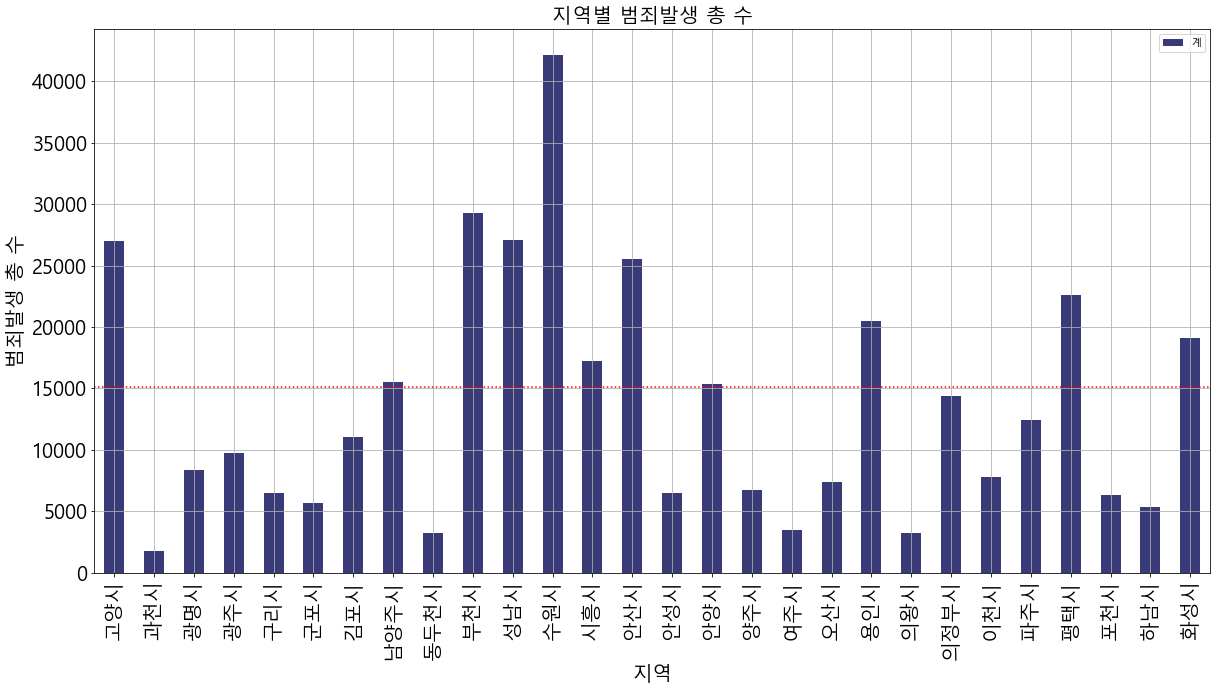

In [150]:
CCTV_bar = crimeRaw.plot.bar(x = '지역', y = '계', grid = True, cmap = 'tab20b', fontsize = 20, figsize =(20,10))
CCTV_bar.set_xlabel("지역", fontsize = 20)
CCTV_bar.set_ylabel("범죄발생 총 수", fontsize = 20)
CCTV_bar.set_title("지역별 범죄발생 총 수", fontsize = 20)

plt.axhline(15155, color='red', linestyle = ':')
#plt.ylim(0,10000)
plt.show()

### 범죄와 CCTV 대수 상관관계 분석
#### 상관계수 & heat map

In [118]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역       28 non-null     object
 1   총 범죄수    28 non-null     int64 
 2   강력범죄     28 non-null     int64 
 3   절도범죄     28 non-null     int64 
 4   폭력범죄     28 non-null     int64 
 5   교통범죄     28 non-null     int64 
 6   관련범죄 합계  28 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.7+ KB


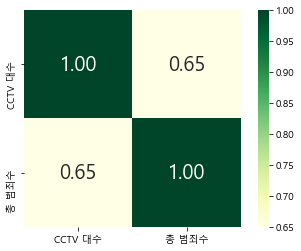

In [153]:

#<상관계수 구하기 위한 테이블>
corta = df[["CCTV 대수", "총 범죄수"]]

#<상관계수 구하기>
corr = corta.corr(method = 'pearson')

#<히트맵>
import seaborn as sns
heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'YlGn')


### CCTV 대수 : 총 범죄수

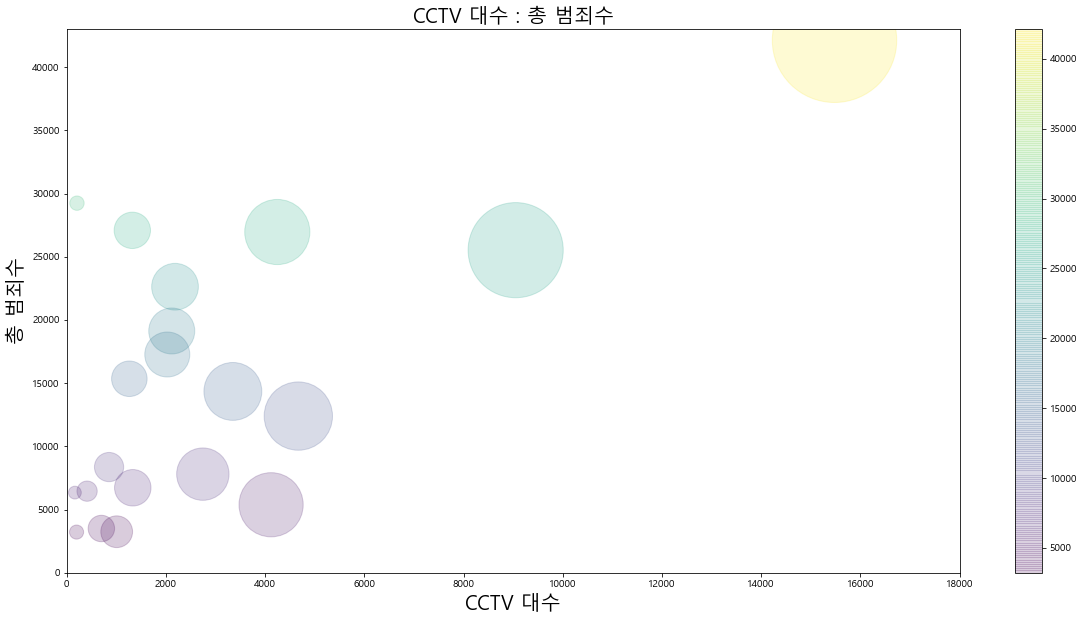

In [161]:
x = df['CCTV 대수']
y = df['총 범죄수']
name = df['지역']

plt.figure(figsize=(20,10))
plt.scatter(x,y, alpha = 0.2,
           s = x, c = y
           )
plt.title('CCTV 대수 : 총 범죄수', fontsize = 20)
plt.xlabel('CCTV 대수', fontsize = 20)
plt.ylabel('총 범죄수', fontsize = 20)
plt.xlim(0,18000)
plt.ylim(0,43000)
plt.colorbar()
plt.cm.autumn
plt.show()

### CCTV 대수 : 관련 범죄 수

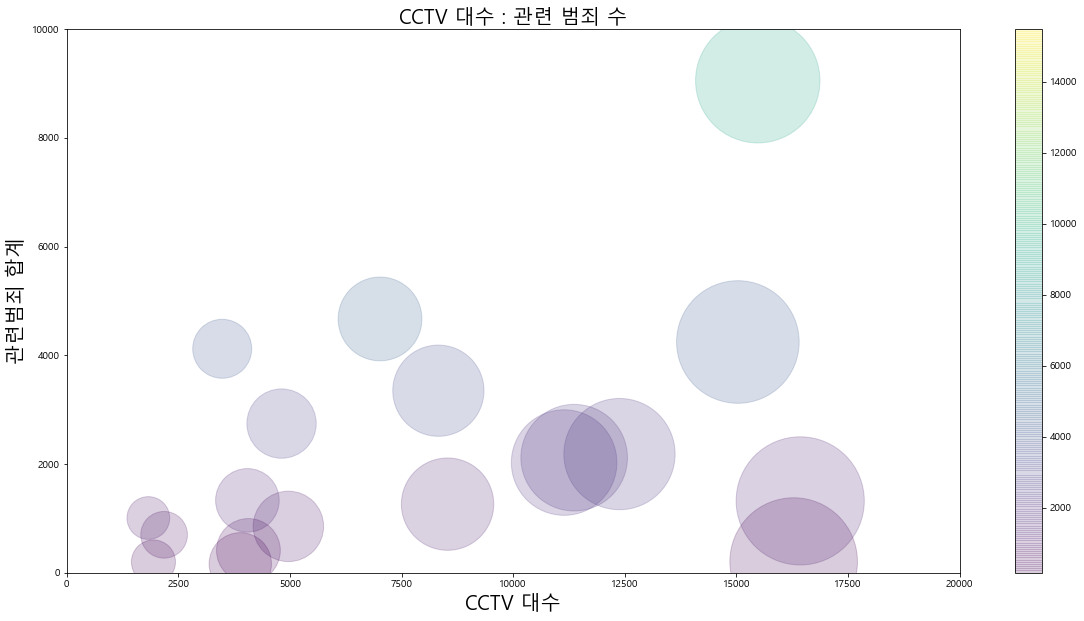

In [162]:
x = df['관련범죄 합계']
y = df["CCTV 대수"]
name = df["지역"]

plt.figure(figsize=(20,10))
plt.scatter(x,y, alpha = 0.2,
           s = x, c = y
           )

plt.title("CCTV 대수 : 관련 범죄 수", fontsize = 20)
plt.xlabel("CCTV 대수", fontsize = 20)
plt.ylabel("관련범죄 합계", fontsize = 20)
plt.xlim(0, 20000)
plt.ylim(0, 10000)
plt.colorbar()
plt.show()

# x축에서 오른쪽로 이동할 수록 컬러 연해짐

## 데이터 시각화 - folium 활용

In [163]:
import folium

In [ ]:
# 지도의 중심 정하기 - 위도/경도 평균 구해서 넣기

lat = c['위도'].mean()
long = cr['경도'].mean()

lat, long